<a href="https://colab.research.google.com/github/ML-Challenge/week3-supervised-learning/blob/master/L1.Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

# Setup

In [ ]:
# Download utils.py to working directory
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/utils.py', 'utils.py')

In [1]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [2]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Classification

In this lesson, we will introduce classification problems and show how to solve them using supervised learning techniques. We will apply the concepts to a political dataset, where we classify the party affiliation of United States members of Congress based on their voting records.

## Exploratory data analysis

Yogi Berra said, "You can observe a lot by watching". The same is true with data. If you can appropriately display your data, you can already start to draw conclusions from it. Therefore exploring the data is a crucial step in analysis. By exploring we mean organizing and plotting the data, and computing a few numerical summaries about it. This idea is known as exploratory data analysis, or EDA, and was developed by one of the greatest statisticians of all time, [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). He wrote a book entitled `Exploratory Data Analysis` in 1977, where he laid out the principles. In that book, he said, "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

### Numerical EDA

In this section, we'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by the US House of Representatives Congressmen. Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that the focus can be directed towards understanding how to train and evaluate supervised learning models.

In [3]:
utils.house_votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [4]:
utils.house_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int8
water                435 non-null int8
budget               435 non-null int8
physician            435 non-null int8
salvador             435 non-null int8
religious            435 non-null int8
satellite            435 non-null int8
aid                  435 non-null int8
missile              435 non-null int8
immigration          435 non-null int8
synfuels             435 non-null int8
education            435 non-null int8
superfund            435 non-null int8
crime                435 non-null int8
duty_free_exports    435 non-null int8
eaa_rsa              435 non-null int8
dtypes: int8(16), object(1)
memory usage: 10.3+ KB


In [5]:
utils.house_votes.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visual EDA

The Numerical EDA we did in the previous example gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give us an even better understanding of the data. Because all the features in this dataset are binary; that is, they are either 0 or 1, we can use [Seaborn's](http://seaborn.pydata.org/generated/seaborn.countplot.html) [countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html) to visualize the data: 

```
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
```

In `sns.countplot()`, we specify the x-axis data to be `'education'`, and hue to be `'party'`. Recall that `'party'` is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

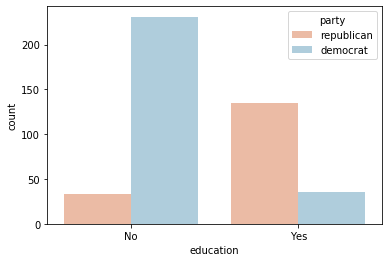

In [6]:
import seaborn as sns

plt.figure()
sns.countplot(x='education', hue='party', data=utils.house_votes, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly *against* this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## The classification challenge

We have a set of labeled data, and we want to build a classifier that takes unlabeled data as input and outputs a label. So how do we construct this classifier? We first need to choose a type of classifier, and it needs to learn from the already labeled data. For this reason, we call the already labeled data the training data. So let's build our first classifier!

### k-Nearest Neighbors

We will choose a simple algorithm called K-nearest neighbors. The basic idea of K-nearest neighbors, or KNN, is to predict the label of any data point by looking at the K, for example, 3, closest labeled data points, and getting them to vote on what label the unlabeled point should have.

In the following image, there's and example of KNN in two dimensions: how do you classify the data point in the middle?

![Two dimensions KNN](assets/KNN.png)

Well, if `k = 3` then the class is `B` but if `k = 6` the class is `A`

### k-NN: Intuition

To get a bit of intuition for KNN, let's checkout out a scatter plot of two dimensions of the Iris dataset, petal lenght and petal width. The following holds for higher dimensions, however, we'll show the 2D case for illustrative purposes.

![Iris Sample](assets/iris.png)

What the KNN algorithm essentially does is to create a set of decision boundaries, and we visualize the 2D case here. Any new data point will be identified according to the zone it is in.

![KNN boundaries](assets/iris_knn.png)

### Scikit-learn fit and predict

All machine learning models in `scikit-learn` are implemented as python classes. These classes serve two purposes: they implement the algorithms for learning a model, and predicting, while also storing all the information that is learned from the data.

Training a model on the data is also called fitting the model to the data. In `scikit-learn`, we use the `.fit()` method to do this.

Similarly, the `.predict()` method is what we use to predict the label of an unlabeled data point.

### k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build our first classifier. In this example, we will fit a k-Nearest Neighbors classifier to the voting dataset.

We must ensure that the data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature, and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Let's create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [7]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Create arrays for the features and the response variable
y = utils.house_votes['party'].values
X = utils.house_votes.drop('party', axis=1).values

In [9]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [10]:
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### k-Nearest Neighbors: Predict

Having fit a k-NN classifier, we can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! We can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

We will use the classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using `.predict()` on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [11]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

In [12]:
X_new = pd.DataFrame([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897, 0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426, 0.73799541]], columns=utils.house_votes_columns[1:])
X_new

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [13]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


## Measuring model performance

Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to figure out how to measure its performance. That is, we need a metric. In classification problems, accuracy is a commonly-used metric.

The accuracy of a classifier is defined as the number of correct predictions divided by the total number of data points. This begs the questions, though: which data do we use to compute accuracy?
What we are interested in is how well our model will perform on new data, that is, samples that the algorithm has never seen before.

Well, we could compute the accuracy of the data that we used to fit the classifier. However, as this data was used to train it, the classifier's performance will not be indicative of how well it can generalize to unseen data. For this reason, it is common practice to split the data into two sets, a training set, and a test set.

We train or fit the classifier on the training set. Then we make predictions on the labeled test set and compare these predictions with the known labels. We then compute the accuracy of our predictions.

### The digits recognition dataset

Up until now, we have been performing binary classification, since the target variable had two possible outcomes. However, we can also perform a multi-class classification, where the target variable could take on many possible outcomes. In the following examples, we'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this example.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black.`scikit-learn's` built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys. Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as we'll see in this example. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that we can access the keys of these Bunch objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

In [14]:
# Import necessary modules
from sklearn import datasets

In [15]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [16]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [17]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


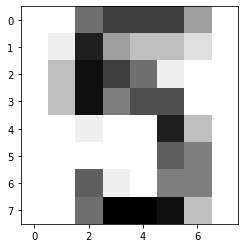

In [18]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test/ Split + Fit/Predict/Accuracy

Now that we have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [19]:
# Import necessary modules
from sklearn.model_selection import train_test_split

In [20]:
# Create feature and target arrays
X = digits.data
y = digits.target

The first argument is the feature data, the second the targets or labels. The `test_size` keyword argument specifies what proportion of the original data is used for the test set. Lastly, the `random_state` kwarg sets a seed for the random number generator that splits the data into a train and test. Setting the seed with the same argument later will allow us to reproduce the exact split and the downstream results.

`train_test_split` returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into four variables: `X_train`, `X_test`, `y_train`, `y_test`, respectively. By default, `train_test_split` splits the data into 75% training data and 25% test data, which is a good rule of thumb. In the next example, we specify the size of the test set to 20%.

It is also best practice to perform the split so that the test split reflects the labels of the data. That is, we want the labels to be distributed in train and test sets as they are in the original dataset. To achieve this, we use the keyword argument `stratify=y`, where `y` is the list or array containing the labels.

In [21]:
# Split into training and test set and stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [22]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [23]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

To check out the accuracy of our model, we use the `.score()` method of the model and pass it `X_test` and `y_test`.

In [24]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


We can see that the accuracy of our K-nearest neighbors model is approximately `98%`, which is pretty good for an out-of-the-box model!

### Model complexity

We discussed the concept of a decision boundary. Here, we visualize a decision boundary for several, increasing values of `K` in a KNN model. Note that, as `K` increases, the decision boundary gets smoother and less curvy. Therefore, we consider it to be a less complex model that those with a lower `K`.

![Decision Boundaries](assets/decision_boundaries.png)

Generally, complex models run the risk of being sensitive to noise in the specific data that we have, rather than reflecting general trends in the data. This is known as `overfitting`.

If we increase the `K` even more and make the model even simpler, then the model will perform less well on both test and training sets, as indicated in this schematic figure, knows as a model complexity curve.

![Model Complexity Curve](assets/underfitting_and_overfitting.png)

We can see that there is a sweet spot in the middle that gives us the best performance on the test set.

### Overfitting and underfitting

In this example, we will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop some intuition for `overfitting` and `underfitting`.

In [25]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [26]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

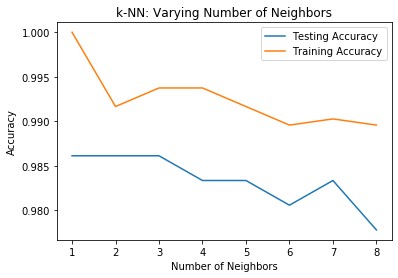

In [27]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()